This notebook runs with `openmc-15-0-env`. However, doesn't need openmc. Just the these python packages here and in the mtri_gmsh_helper.py. It needs `gmsh` and `python-gmsh` packages.

In [1]:
from mtri_gmsh_helpers import *
import numpy as np
import netCDF4 as nc

## Imported Data
These are read from the `geometry.nc` file generated by DEGAS2 (`definegeometry2d` tool).

In [2]:
!pwd

/users/hasanm4/lore.scorec.rpi.edu/wsources/DEGAS2-XGC/Degas2-Geom-Debug


In [3]:
#geometry_filename = "/users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/geometry.nc"
geometry_filename = "geometry.nc"

ds = nc.Dataset(geometry_filename)

# check if the `ncells` variable exists in the dataset and has value 46
assert 'ncells' in ds.variables, "Variable 'ncells' not found in dataset."
ncells_value = ds.variables['ncells'][:]
assert ncells_value == 46, f"Expected 'ncells' to be 46, but got {ncells_value}."

In [4]:
surface_coeffs = ds.variables['surface_coeffs'][:]
cells = ds.variables['cells'][:]
boundaries = ds.variables['boundaries'][:]
surface_points = ds.variables['surface_points'][:]
zone_centers = ds.variables['zone_center'][:]
zone_min = ds.variables['zone_min'][:]
zone_max = ds.variables['zone_max'][:]
surfaces = ds.variables['surfaces'][:]
neighbors = ds.variables['neighbors'][:]
surface_sectors = ds.variables['surface_sectors'][:]

ds.close()

surface_coeffs = np.array(surface_coeffs)
cells = np.array(cells)
boundaries = np.array(boundaries)
surface_points = np.array(surface_points)
zone_centers = np.array(zone_centers)
zone_min = np.array(zone_min)
zone_max = np.array(zone_max)
surfaces = np.array(surfaces)
neighbors = np.array(neighbors)
surface_sectors = np.array(surface_sectors)

In [5]:
surface_check_id = 3
evaluate_dg2_quadric(surface_coeffs[surface_check_id], (1,0,1)), surface_coeffs[surface_check_id]

(np.float64(1.4), array([1. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ]))

## Plot Surfaces
---
Plot the quadratic surfaces projected onto the XZ plane for each cell.

In [6]:
mesh = load_triangulation('unique_triangulation.pkl')
mtri_to_gmsh(mesh, "degas2-mesh.msh")

Triangulation loaded from unique_triangulation.pkl
Info    : Writing 'degas2-mesh.msh'...
Info    : Done writing 'degas2-mesh.msh'
GMSH mesh written to degas2-mesh.msh


This is to identify the connectivity of the cells.

In [7]:
np.max(surfaces), len(neighbors), max(neighbors), surfaces.shape, surface_coeffs.shape

(np.int32(67), 67, np.int32(46), (118, 2, 2), (118, 10))

Cell 1 boundaries: [6 7 5] with signs [ 1 -1  1]


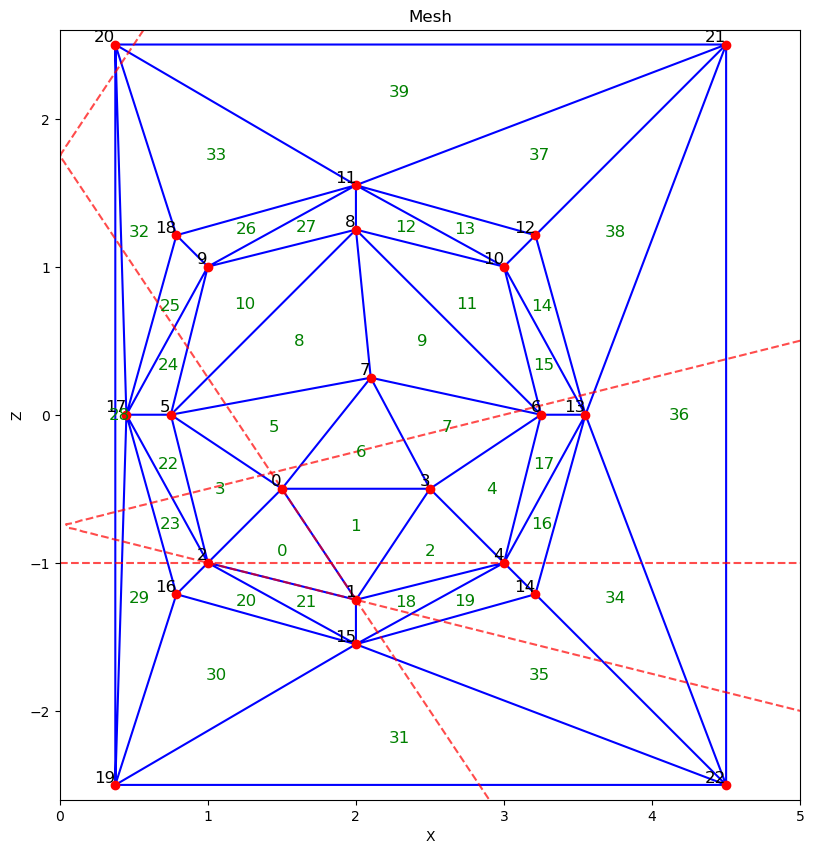

In [8]:
cell_id = 1
cell_boundary_ids, signs = get_cell_boundaries(cell_id, cells, boundaries)
print(f"Cell {cell_id} boundaries: {cell_boundary_ids} with signs {signs}")
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)
for b_id in cell_boundary_ids:
    plot_quad_on_xz(surface_coeffs[b_id], (0,5), (-5,5), axis=ax)
    
#plot_quad_on_xz(surface_coeffs[12], (0,5), (-5,5))
ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

We found that there are cells that are subdivides of some triangles which counts for the mismatch in the number of cells (46) vs number of triangles (40) + one univeral cell (1) = 41.

    1  sector_surface[sector1], sector1, k         -18          12         -18
    2  sector_surface[sector1], sector1, k          18          11          18
    3  sector_surface[sector1], sector1, k         -41          16         -41
    4  sector_surface[sector1], sector1, k          41          15          41
    5  sector_surface[sector1], sector1, k          40          13          40
    6  sector_surface[sector1], sector1, k         -18          12         -18
    7  sector_surface[sector1], sector1, k          22           5          22
    8  sector_surface[sector1], sector1, k         -40          14         -40
    9  sector_surface[sector1], sector1, k          45           3          45
   10  sector_surface[sector1], sector1, k         -41          16         -41

In [9]:
sectors = np.array([10, 9, 8, 7, 12, 11, 6, 5, 14, 13, 16, 15, 2, 1, 4, 3])
sector_surface = np.array([2000000000, 44, -44, 45, -45, 22, -22, 14, -14, 7, -7, 18, -18, 40, -40, 41, -41])

In [10]:
surface_sectors

array([[[ 1,  1],
        [ 0,  0]],

       [[ 1,  1],
        [ 0,  0]],

       [[ 1,  1],
        [ 0,  0]],

       [[ 1,  1],
        [ 0,  0]],

       [[ 1,  1],
        [ 0,  0]],

       [[ 1,  1],
        [ 0,  0]],

       [[ 1,  2],
        [ 1,  1]],

       [[ 3,  3],
        [ 0,  0]],

       [[ 3,  3],
        [ 0,  0]],

       [[ 3,  3],
        [ 0,  0]],

       [[ 3,  3],
        [ 0,  0]],

       [[ 3,  3],
        [ 0,  0]],

       [[ 3,  3],
        [ 0,  0]],

       [[ 3,  4],
        [ 1,  1]],

       [[ 5,  5],
        [ 0,  0]],

       [[ 5,  5],
        [ 0,  0]],

       [[ 5,  5],
        [ 0,  0]],

       [[ 5,  6],
        [ 1,  1]],

       [[ 7,  7],
        [ 0,  0]],

       [[ 7,  7],
        [ 0,  0]],

       [[ 7,  7],
        [ 0,  0]],

       [[ 7,  8],
        [ 1,  1]],

       [[ 9,  9],
        [ 0,  0]],

       [[ 9,  9],
        [ 0,  0]],

       [[ 9,  9],
        [ 0,  0]],

       [[ 9,  9],
        [ 0,  0]],

       [[ 9,

In [11]:
sector_draft = np.repeat(2* (np.argsort(sector_surface[1::2]) + 1), 2)
sector_draft[1::2] -= 1
sector_draft

array([10,  9,  8,  7, 12, 11,  6,  5, 14, 13, 16, 15,  2,  1,  4,  3])

In [12]:
np.argsort(sector_surface[1::2])    

array([4, 3, 5, 2, 6, 7, 0, 1])

In [13]:
surface_test_id = 22
sector_surface[sectors[surface_sectors[surface_test_id-1][0] -1]]

array([-22,  22])

In [14]:
surface_sectors[6][0], surface_sectors[13]

(array([1, 2], dtype=int32),
 array([[3, 4],
        [1, 1]], dtype=int32))

In [15]:
find_these = np.where(surface_sectors[:, 1, :] == [1,1])[0][::2] + 1
indices = [np.where(sector_surface == val)[0][0] for val in find_these]

In [16]:
indices

[np.int64(9),
 np.int64(7),
 np.int64(11),
 np.int64(5),
 np.int64(13),
 np.int64(15),
 np.int64(1),
 np.int64(3)]

In [17]:
sector_surface[sectors] 

array([ -7,   7, -14,  14, -18,  18, -22,  22, -40,  40, -41,  41, -44,
        44, -45,  45])

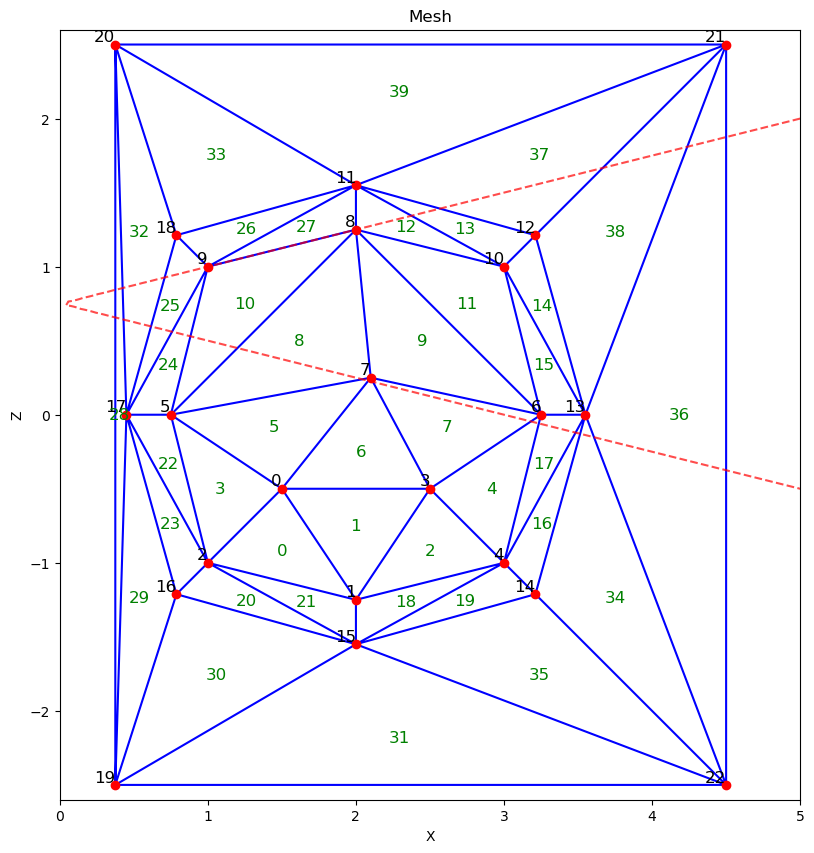

In [18]:
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)

test_edge_id = 40
get_neighboring_cells(test_edge_id, surfaces, neighbors)

plot_quad_on_xz(surface_coeffs[test_edge_id], (0,5), (-5,5), axis=ax)
    
#plot_quad_on_xz(surface_coeffs[12], (0,5), (-5,5))
ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

In [19]:
for i in range(len(surfaces)):
    neg, pos = get_neighboring_cells(i, surfaces, neighbors)
    if 0 in neg or 0 in pos:
        print(f"surface {i}, neighbors: {get_neighboring_cells(i, surfaces, neighbors)}")


surface 0, neighbors: (array([], dtype=int32), array([ 0, 33], dtype=int32))
surface 1, neighbors: (array([], dtype=int32), array([ 0, 46], dtype=int32))
surface 2, neighbors: (array([], dtype=int32), array([ 0, 42], dtype=int32))
surface 3, neighbors: (array([], dtype=int32), array([ 0, 36], dtype=int32))


In [20]:
get_cell_boundaries(17, cells, boundaries)

(array([43, 47, 46, 48], dtype=int32), array([-1,  1,  1, -1], dtype=int32))

This is showing the sectors and matches the idea with zone. That means, the `sector_zone` array contain the zone ids for each the two adjacent zones (not cell id) for each boundary and they are not signed. Zone ids are 1-indexed and it is shown below that the counter is added by 1 to match the zone ids.

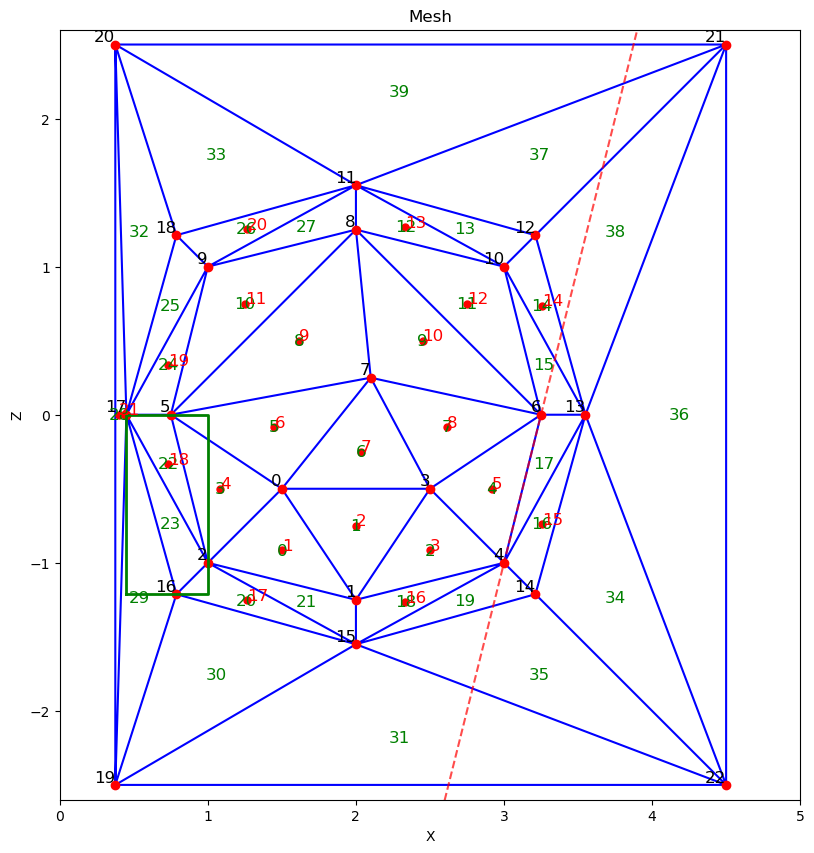

In [23]:
# plot zone centers
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)

# print zone ids
for i, (x, z) in enumerate(zone_centers[:, [0, 2]]):
    ax.text(x, z, str(i+1), color='red', fontsize=12)
    
# plot dot at zone centers
ax.plot(zone_centers[:, 0], zone_centers[:, 2], 'ro', markersize=5)

plot_quad_on_xz(surface_coeffs[21], (0,5), (-5,5), axis=ax)


zone_box_id = 17
# plot zone bounding box wth a rectangle
ax.plot([zone_min[zone_box_id, 0], zone_max[zone_box_id, 0], zone_max[zone_box_id, 0], zone_min[zone_box_id, 0], zone_min[zone_box_id, 0]],
        [zone_min[zone_box_id, 2], zone_min[zone_box_id, 2], zone_max[zone_box_id, 2], zone_max[zone_box_id, 2], zone_min[zone_box_id, 2]], 'g-', linewidth=2)

ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()